# Analysing Tata-power stock price

Tata Power is one of India's largest integrated power companies, present across the entire power value chain of conventional & renewable energy, power services, and next-generation customer solutions including solar rooftop, EV charging stations, and home automation.

### dataset -
i got this dataset from chirantam-sym (github)--
 https://github.com/chirantan-sym/TATAPOWER-Stock-Analysis-MSExcel


#### about dataset -
The dataset provides historical data at the daily level from July 2021 to July 2022. Their columns include the following:

- Date: Date the data was recorded
- Open: Price from the first transaction of a trading day
- High: Maximum price in a trading day
- Low: Minimum price in a trading day
- Close: Price from the last transaction of a trading day
- Adj close: The closing price after dividend payouts, stock splits, or the issue of additional shares
- Volume: Number of units traded in a day
- All displayed currencies are in INR.

## Goal
Cleansing and preparing the data for making graphs and getting insights from
 it so that we can get the idea of how the stock price was behaving in the previous years and whether it is viable to hold/purchase in future or not.

##### Help taken from geekforgeeks,seaborn and matplotlib documentation,guisamora pandas excercise
***


### Importing necessary libraries and dataset


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlretrieve


%matplotlib inline

In [3]:
# downloading the dataset
url = "https://raw.githubusercontent.com/chirantan-sym/TATAPOWER-Stock-Analysis-MSExcel/main/TATAPOWER.NS_Stock.csv"
urlretrieve(url,filename="TATAPOWER.NS_Stock.csv")

('TATAPOWER.NS_Stock.csv', <http.client.HTTPMessage at 0x7ecd8e926bf0>)

In [4]:
data = pd.read_csv("TATAPOWER.NS_Stock.csv")

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-06,126.000000,126.500000,122.050003,123.000000,122.023369,31062811
1,2021-07-07,123.000000,124.500000,122.150002,123.849998,122.866615,19773453
2,2021-07-08,124.099998,126.849998,122.400002,123.400002,122.420189,33870196
3,2021-07-09,123.000000,124.800003,121.699997,124.449997,123.461853,24078290
4,2021-07-12,126.000000,126.300003,123.449997,123.800003,122.817017,26731429


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2022-06-30,207.300003,209.250000,201.399994,202.199997,202.199997,16161389
246,2022-07-01,202.699997,207.649994,200.600006,207.000000,207.000000,15807993
247,2022-07-04,207.699997,212.800003,207.199997,211.449997,211.449997,14714951
248,2022-07-05,214.500000,217.100006,212.000000,212.800003,212.800003,18209477
249,2022-07-06,212.500000,214.100006,210.100006,212.000000,212.000000,6967710


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


### checking dimensions

In [8]:
print(f"number of rows : {data.shape[0]} and column : {data.shape[1]}")

number of rows : 250 and column : 7


#### Converting the datatype of Date column into datetime


In [9]:
data.Date = pd.to_datetime(data.Date)

In [10]:
data.Date.dtype

dtype('<M8[ns]')

### 1. first, lets analyze the "volume" of stock  which is the number of share bought and sold

In [11]:
data.Date.dt.month

0      7
1      7
2      7
3      7
4      7
      ..
245    6
246    7
247    7
248    7
249    7
Name: Date, Length: 250, dtype: int32

In [12]:
#first
data['month'] = data.Date.dt.month

<ipython-input-13-13aad2902a56>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(monthly.Volume,palette=palette)


<Axes: title={'center': 'Monthly Trading volume \n july 2021 to july 2022'}, xlabel='month', ylabel='Volume in Billions'>

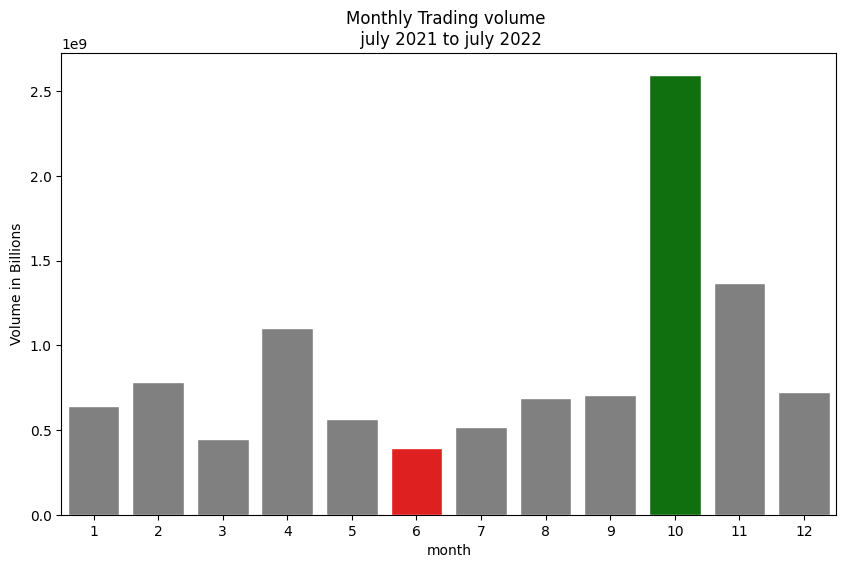

In [13]:
monthly = data.groupby('month')[['Volume']].sum()

plt.figure(figsize=(10, 6))
plt.title("Monthly Trading volume \n july 2021 to july 2022")
plt.ylabel("Volume in Billions")
sns.set_style("dark")

#color palette
palette = ["gray"]*len(monthly)
#highlighting smallest and largest bar
#subtracting one because our index that is month starts from 1
palette[monthly.Volume.idxmin()-1] = "red"
palette[monthly.Volume.idxmax()-1] = "green"


sns.barplot(monthly.Volume,palette=palette)

 **As we can see that in the month of june trading were the lowest and in the month of october trading were on peak**

### 2. Relationship between daily low and daily high

         Date   Open        High    Low   Close   Adj Close     Volume  month  \
71 2021-10-19  266.0  267.850006  221.5  229.75  227.925766  245771135     10   

    H_L_spread  
71   46.350006  


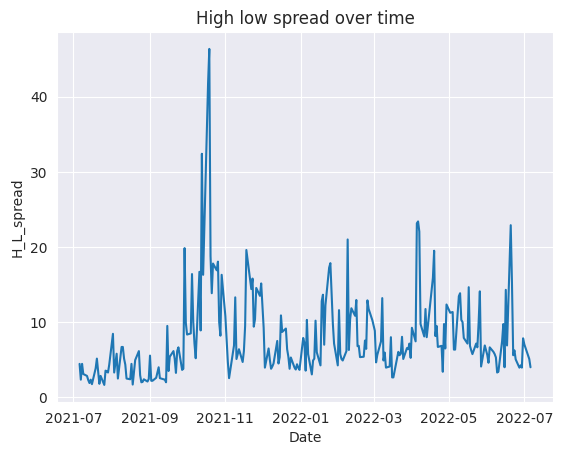

In [14]:

data["H_L_spread"] = data["High"]-data["Low"]
print(data[data["H_L_spread"]==data["H_L_spread"].max()])

sns.lineplot(data=data,x="Date",y="H_L_spread")
# sns.lineplot(data=data,x="Date",y="Close")

plt.title("High low spread over time")

plt.grid(True)

on  **11 october 2021** there was a deal that pumped the stock price.
<br>
"Tata Power jumps 4%, hits new high as solar arm wins multiple orders."
<br>
- after that the spread is stable which can be used for entry and exit points


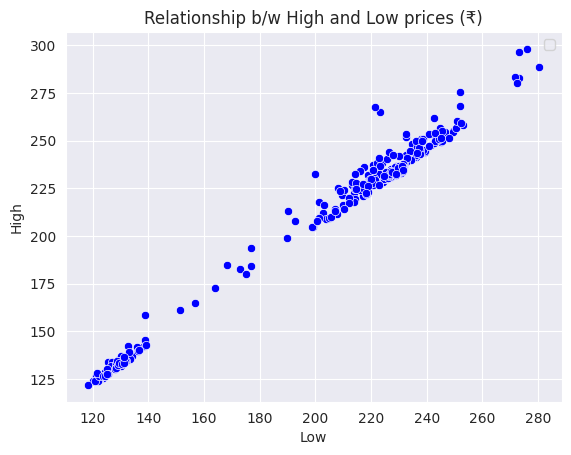

In [15]:
sns.scatterplot(data=data,x="Low",y="High",c="blue")


plt.title("Relationship b/w High and Low prices (₹)")
plt.grid(True)
plt.legend()



- strong positive linear relationship between low and high price
- steeper and clustered  
- low price can be used as indicator to estimate the high price

### 3.Closing prices over time

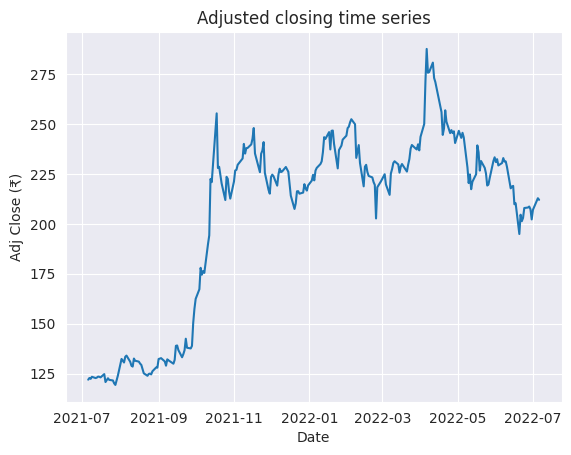

In [16]:
sns.lineplot(data=data,x="Date",y="Adj Close")
sns.set_style("whitegrid")
plt.title("Adjusted closing time series")
plt.ylabel("Adj Close (₹)")
plt.grid(True)

- As we can see that in october 2021 there was bullish sentiments or favourable market condition which pushed the stock.
- Second peak was approx in march 2022.
- thereafter downtrend started maybe stock correction or negative news
- in the july month it gets new support level from which it maybe start rising.

#### 4. Monthly Candlestick chart

In [17]:
##first creating a copy of data and setting index to Datetime

monthly = data.copy()
monthly.set_index('Date',inplace=True)
monthly.head()

,Open,High,Low,Close,Adj Close,Volume,month,H_L_spread
Date,,,,,,,,
2021-07-06,126.000000,126.500000,122.050003,123.000000,122.023369,31062811,7,4.449997
2021-07-07,123.000000,124.500000,122.150002,123.849998,122.866615,19773453,7,2.349998
2021-07-08,124.099998,126.849998,122.400002,123.400002,122.420189,33870196,7,4.449996
2021-07-09,123.000000,124.800003,121.699997,124.449997,123.461853,24078290,7,3.100006
2021-07-12,126.000000,126.300003,123.449997,123.800003,122.817017,26731429,7,2.850006


In [18]:
#reducing the data to monthwise
monthly = monthly.resample(rule="M").mean()

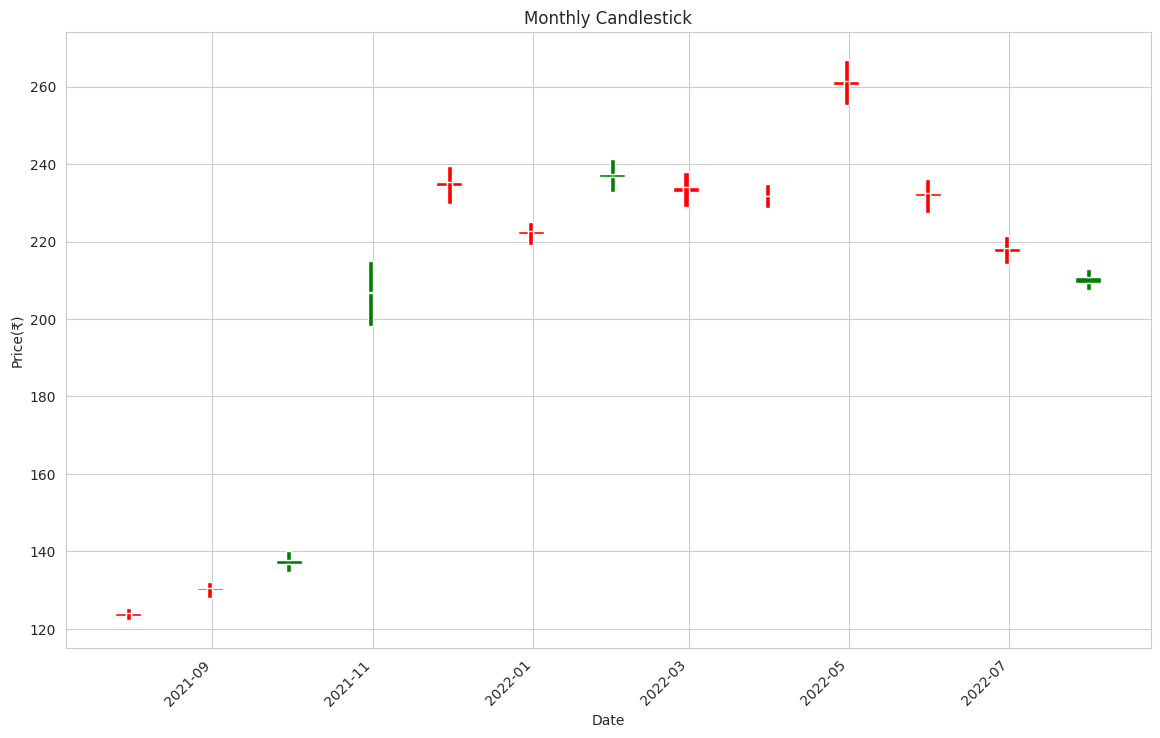

In [44]:


width = 10
width2 = 2

#up includes the dataset in which stock increase and reverse for down
up = monthly[monthly.Close>=monthly.Open]
down = monthly[monthly.Close<monthly.Open]

#setting figure size
plt.figure(figsize=(14,8))


#green for up and red for down
col1 = 'green'
col2 = 'red'


#up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

#down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High-down.Close,width2,bottom=down.Close,color=col2)
plt.bar(down.index,down.Low-down.Open,width2,bottom=down.Open,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')


plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Price(₹)")
plt.title("Monthly Candlestick")

#display candlestick chart
plt.show()

- during the period the price was very volatile which is indicated by long thin sticks
- after november the movement seem withing the range